## Composite Estimators using Pipeline & FeatureUnions

<hr>

### Agenda
1. Introduction to Composite Estimators
2. Pipelines
3. TransformedTargetRegressor


PS: scikit version 0.20

<hr>

### 1. Introduction to Composite Estimators
* One or more transformers are connected to estimators resulting into composite estimator.
* Composite transformer is implemented using Pipeline
* FeatureUnion is used to concatenate output of transformers to create derived feature
* Pipeline make machine learning code reuseable & modular

### 2. Pipeline
* Before data is fed to learning algorithm, it needs to be handled for missing values.
* Different pre-processing needs to be done.
* The output of preprocessor is to be subjected to next preprocessor & finally the estimator
* This whole process can be automated using Pipeline

<img src="https://github.com/awantik/machine-learning-slides/blob/master/pipeline-ml2.png?raw=true">

* Intermediate steps .i.e transformers must implement fit & transform
* The same trained pipeline can used for prediction

#### Predicting Cancer

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# to do
# build a pipeline and train the models
# evaluate them

In [7]:
from sklearn.pipeline import make_pipeline

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [18]:
pipelines = []
for model in [LogisticRegression(max_iter=1000, solver="saga"), DecisionTreeClassifier(), RandomForestClassifier(), SVC(C=10)]:
    pipeline = make_pipeline(
              SimpleImputer(strategy="mean"),
              RobustScaler(),
              model,
              verbose=True)
    pipelines.append(pipeline)

In [19]:
pipelines[1].steps[2]

('decisiontreeclassifier', DecisionTreeClassifier())

In [20]:
pipelines[2].steps[2]

('randomforestclassifier', RandomForestClassifier())

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
trainX,testX,trainY,testY = train_test_split(cancer_data.data, cancer_data.target)

In [23]:
for pipeline in pipelines:
    pipeline.fit(trainX, trainY)

[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing logisticregression, total=   0.2s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing decisiontreeclassifier, total=   0.0s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline]  (step 3 of 3) Processing randomforestclassifier, total=   0.2s
[Pipeline] ..... (step 1 of 3) Processing simpleimputer, total=   0.0s
[Pipeline] ...... (step 2 of 3) Processing robustscaler, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing svc, total=   0.0s


In [24]:
for pipeline in pipelines:
    print (pipeline.score(testX, testY))

0.986013986013986
0.9230769230769231
0.9440559440559441
0.972027972027972


In [25]:
from sklearn.metrics import classification_report

In [27]:
for pipeline in pipelines:
    print(pipeline.steps[2])
    print (classification_report(testY, pipeline.predict(testX)))

('logisticregression', LogisticRegression(max_iter=1000, solver='saga'))
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.98      1.00      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

('decisiontreeclassifier', DecisionTreeClassifier())
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        53
           1       0.91      0.98      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143

('randomforestclassifier', RandomForestClassifier())
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        53
           1       0.94      0.98      0.96        90

   

#### Caching transformers within a Pipeline
* Storing state of transformers is also possible to prevent recomputation of transformers
* When pipeline is subjected to GridSearch situations like this happens

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svc_pipe =  make_pipeline(
              CountVectorizer(stop_words='english'),
              TfidfTransformer(),
              SVC())

In [ ]:
dt_pipe = make_pipeline(
              CountVectorizer(stop_words='english'),
              TfidfTransformer(),
              DecisionTreeClassifier())

In [ ]:
svc_pipe

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=Non...one)),
                ('tfidftransformer',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='

In [ ]:
svc_pipe.steps[2]

('svc',
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False))

In [ ]:
import numpy as np
params = {
    'svc__C': list(np.logspace(1,20,20))
}

In [ ]:
dt_pipe.steps[2]

('decisiontreeclassifier',
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'))

In [ ]:
params = {
    'countvectorizer__max_features':[5000,7500,10000],
    'decisiontreeclassifier__max_depth':[100,200]
}

In [ ]:
gs = GridSearchCV(dt_pipe,cv=5,param_grid=params, n_jobs=-1)

In [ ]:
%timeit gs.fit(trainX,trainY)

1 loop, best of 5: 51.2 s per loop


In [ ]:
gs.best_params_

{'countvectorizer__max_features': 7500,
 'decisiontreeclassifier__max_depth': 200}

In [ ]:
gs.best_score_

0.6069871015206716

%timeit gs.fit(trainX,trainY)

In [ ]:
! pip install sklearn.utils

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
  Created wheel for sklearn.utils: filename=sklearn_utils-0.0.15-cp36-none-any.whl size=27880 sha256=4dfef61f26c59e53c5d96bd109fa9e2c3e1b31dcb11b4dc935fa77d3ecac6335
  Stored in directory: /root/.cache/pip/wheels/eb/4e/57/de4e188f2e7989e7e45e07af4fea41237ae77b9931f3c82c26
  Created wheel for dill: filename=dill-0.2.7.1-cp36-none-any.whl size=54544 sha256=d17ec4381fbaa3a6c01a2c56ad87f50c9ea9451c1a2e019546750551cb9d6009
  Stored in directory: /root/.cache/pip/wheels/99/c4/ed/1b64d2d5809e60d5a3685530432f6159d6a9959739facb61f2
Successfully built sklearn.utils dill
ERROR: multiprocess 0.70.9 has requirement dill>=0.3.1, but you'll have dill 0.2.7.1 which is incompatible.
  Found existing installation: dill 0.3.1.1
    Uninstalling dill-0.3.1.1:
      Successfully uninstalled dill-0.3.1.1


In [ ]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.utils import Memory

cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=0)
svc_pipe_cached =  make_pipeline(
              CountVectorizer(stop_words='english'),
              TfidfTransformer(),
              SVC(), memory = memory)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
! pip install joblib
joblib.memory

In [ ]:
params = {
    'svc__C': list(np.logspace(1,20,20))
}

In [ ]:
gs_cached = GridSearchCV(svc_pipe_cached,cv=5,param_grid=params, verbose=0)

In [ ]:
%timeit gs_cached.fit(trainX,trainY)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:317: UserWarning: Persisting input arguments took 2.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:317: UserWarning: Persisting input arguments took 2.01s to run.
If this happens often in your code, it can cause performance problems 
(results will b

KeyboardInterrupt: ignored

### 3. Transforming target in regression
* Dependent variables & independent variables should be linearly related
* In case, dependent variable is not normally distribted. We can make it happen for better error.
* The prediction also needs to be remapped
* This entire process can be automated using TransformedTargetRegressor

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
X = boston.data

In [ ]:
y = boston.target

In [ ]:
regressor = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('R2 score: {0:.2f}'.format(regressor.score(X_test, y_test)))

R2 score: 0.64


In [ ]:
pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
mean_absolute_error(y_pred=pred, y_true=y_test)

3.6683301481357256

In [ ]:
r2_score(y_pred=pred,y_true=y_test )

0.635463843320211

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f225cfe27d0>,
      dtype=object)

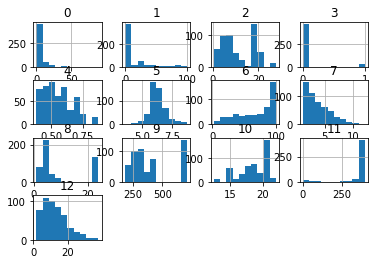

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

boston_df = pd.DataFrame(boston.data)
boston_df.hist()

### Convert data from non-normal distribution to normal distribution

In [ ]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

In [ ]:
# pt = PowerTransformer()

In [ ]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

In [ ]:
#X_tf = pt.fit_transform(X)
#OR
X_tf = qt.fit_transform(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f225c4b0fd0>,
      dtype=object)

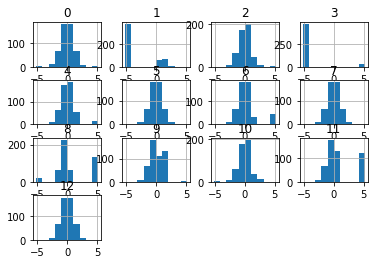

In [ ]:
boston_df_transformed = pd.DataFrame(X_tf)
boston_df_transformed.hist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, random_state=0)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('R2 score: {0:.2f}'.format(regressor.score(X_test, y_test)))

R2 score: 0.66


In [ ]:
pred = regressor.predict(X_test)

In [ ]:
mean_absolute_error(y_pred=pred, y_true=y_test)

3.6336016920720833

In [ ]:
from sklearn.compose import TransformedTargetRegressor

In [ ]:
regr = TransformedTargetRegressor(regressor=regressor,transformer=qt)

In [ ]:
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (500) is greater than the total number of samples (379). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=QuantileTransformer(n_quantiles=500,
                                                           output_distribution='normal'))

In [ ]:
pred = regr.predict(X_test)

In [ ]:
mean_absolute_error(y_pred=pred, y_true=y_test)

3.3488150694668417

In [ ]:
r2_score(y_pred=pred, y_true=y_test)

0.7103483397791333

#### Hyper-parameters of TransformedTargetRegressor
* regressor - initialized model
* transformer - which supports transform & inverse_transform functions
* function - to convert target
* inverse_function - to convert back predicted target in original data scale